# **TESLA LSTM STOCK PRICE PREDICTION**

**Importing Required Packages:**

In [1]:
import pandas_datareader as pdr
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Flatten
import tensorflow as tf

**Data Collection Tesla Data**

In [2]:
df1=pd.read_csv("Tesla_stocks.csv")

In [3]:
df1.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2018-01-02 00:00:00+00:00,320.53,322.11,311.00,312.00,4326988,21.368667,21.474000,20.733333,20.800000,64904820,0.0,1.0
1,TSLA,2018-01-03 00:00:00+00:00,317.25,325.25,315.55,321.00,4185665,21.150000,21.683333,21.036667,21.400000,62784975,0.0,1.0
2,TSLA,2018-01-04 00:00:00+00:00,314.62,318.55,305.68,312.87,9915932,20.974667,21.236667,20.378667,20.858000,148738980,0.0,1.0
3,TSLA,2018-01-05 00:00:00+00:00,316.58,317.24,312.00,316.62,4578729,21.105333,21.149333,20.800000,21.108000,68680935,0.0,1.0
4,TSLA,2018-01-08 00:00:00+00:00,336.41,337.02,315.50,316.00,9777059,22.427333,22.468000,21.033333,21.066667,146655885,0.0,1.0


In [4]:
df1.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1402,TSLA,2023-07-31 00:00:00+00:00,267.43,269.08,263.78,267.48,84582172,267.43,269.08,263.78,267.48,84582172,0.0,1.0
1403,TSLA,2023-08-01 00:00:00+00:00,261.07,266.47,260.25,266.26,83645720,261.07,266.47,260.25,266.26,83645720,0.0,1.0
1404,TSLA,2023-08-02 00:00:00+00:00,254.11,259.52,250.49,255.57,101752865,254.11,259.52,250.49,255.57,101752865,0.0,1.0
1405,TSLA,2023-08-03 00:00:00+00:00,259.32,260.49,252.00,252.04,97829545,259.32,260.49,252.00,252.04,97829545,0.0,1.0
1406,TSLA,2023-08-04 00:00:00+00:00,253.86,264.77,253.11,260.97,99539907,253.86,264.77,253.11,260.97,99539907,0.0,1.0


**Selecting Open value**

In [44]:
df=df1['open']

In [45]:
df.shape

(1407,)

In [46]:
df.head()

0    312.00
1    321.00
2    312.87
3    316.62
4    316.00
Name: open, dtype: float64

**Data Visualization**

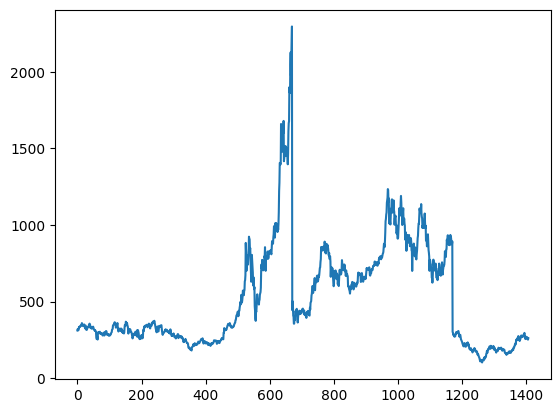

In [47]:
plt.plot(df)

In [48]:
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [49]:
df

array([[0.0953415 ],
       [0.09944711],
       [0.09573837],
       ...,
       [0.06959929],
       [0.06798898],
       [0.07206266]])

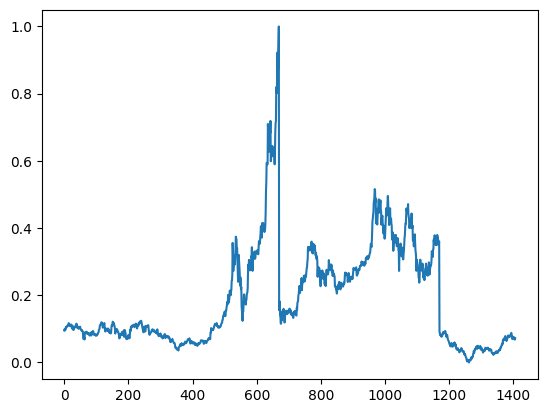

In [50]:
plt.plot(df)

In [51]:
training_size=int(len(df)*0.65)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [52]:
training_size,test_size

(914, 493)

**Data Preprocessing for Time Serise Data**

In [55]:
def Preprocess_data(dataset,time_step):
  X,Y=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    X.append(a)
    b=dataset[i+time_step,0]
    Y.append(b)

  return numpy.array(X),numpy.array(Y)

In [57]:
x_train,y_train = Preprocess_data(train_data,365)
x_test,y_test = Preprocess_data(test_data,365)

x_train.shape

In [59]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
x_test.shape

(127, 365, 1)

**Model Engineering**

In [60]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(365,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 365, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 365, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Model Training**

In [61]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 8s 507ms/step - loss: 0.0234 - accuracy: 0.0000e+00 - val_loss: 0.0055 - val_accuracy: 0.0000e+00
Epoch 2/100
9/9 [==============================] - 4s 427ms/step - loss: 0.0134 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 3/100
9/9 [==============================] - 4s 429ms/step - loss: 0.0108 - accuracy: 0.0018 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 4/100
9/9 [==============================] - 4s 429ms/step - loss: 0.0101 - accuracy: 0.0018 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 5/100
9/9 [==============================] - 4s 441ms/step - loss: 0.0083 - accuracy: 0.0018 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 6/100
9/9 [==============================] - 4s 450ms/step - loss: 0.0076 - accuracy: 0.0018 - val_loss: 2.7472e-04 - val_accuracy: 0.0000e+00
Epoch 7/100
9/9 [==============================] - 4s 445ms/step - loss: 0.0076 - accuracy: 0.0018 - val_loss: 8.3524e

**MODEL PREDICTION**

In [62]:
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

4/4 [==============================] - 0s 87ms/step


In [63]:
train_pred.shape

(548, 1)

**Train Prediction**

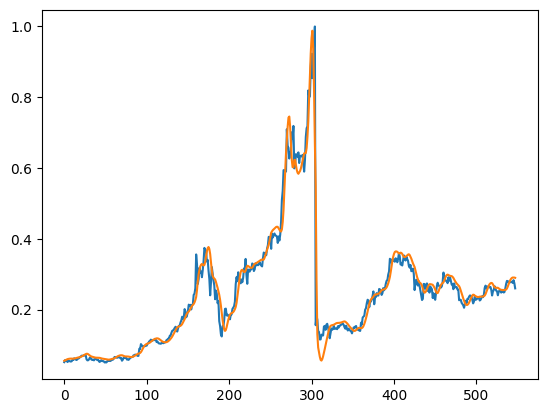

In [64]:
plt.plot(y_train,label='Actual_train_target value')
plt.plot(train_pred)

In [22]:
y_train.shape

(548,)

In [23]:
test_pred.shape

(127, 1)

**Test Prediction**

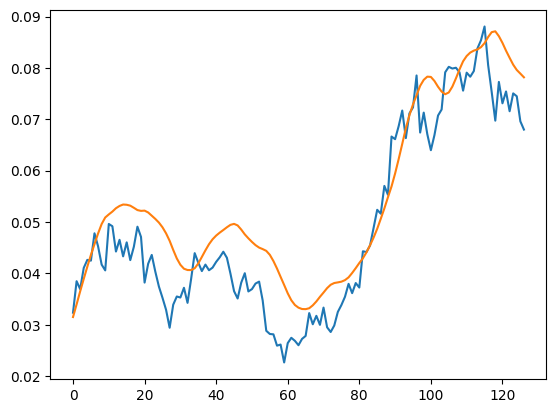

In [82]:
plt.plot(y_test,label='test actual data')
plt.plot(test_pred,label='test predicted data')

**Calculating RMSE**

In [83]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

726.7297476166528

In [84]:
math.sqrt(mean_squared_error(y_test,test_predict))

224.6548067192766

**Ploting test and train predicted dat on original data**

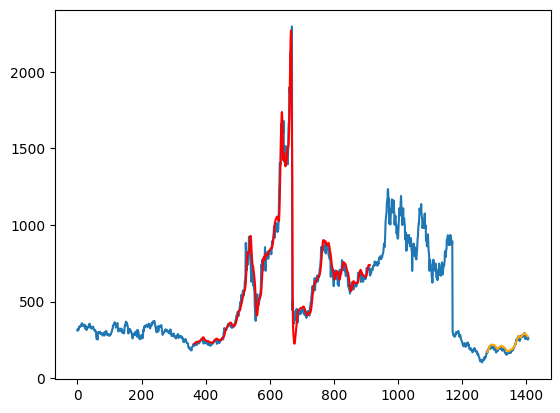

In [86]:
import numpy as np
import matplotlib.pyplot as plt


look_back = 365

trainPredictPlot = np.full_like(df, np.nan)
testPredictPlot = np.full_like(df, np.nan)

train_predict_reshaped = train_predict.reshape(-1, 1)
test_predict_reshaped = test_predict.reshape(-1, 1)

trainPredictPlot[look_back:look_back+len(train_predict_reshaped)] = train_predict_reshaped


testPredictPlot[look_back*2+len(train_predict_reshaped):look_back*2+len(train_predict_reshaped)+len(test_predict_reshaped)] = test_predict_reshaped

plt.plot(df1['open'])
plt.plot(trainPredictPlot, color='red')
plt.plot(testPredictPlot, color='orange')
plt.show()


**Predicting Future 90 days Stocks**

In [87]:
n_days = 90
x_input = test_data[-90:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
lst_output = []
n_steps = 365

for i in range(n_days):
    if len(temp_input) >= n_steps:
        x_input = np.array(temp_input[-n_steps:])  # Use the last n_steps elements
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape(1, len(temp_input), 1)  # Use all available data
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())


extended_predictions = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1))

day_new_extended = np.arange(len(df1), len(df1) + n_days)

In [88]:
print(lst_output)

[[0.07649081200361252], [0.07624440640211105], [0.07650671899318695], [0.07714015245437622], [0.07800483703613281], [0.07899931818246841], [0.0800628587603569], [0.0811644196510315], [0.08229045569896698], [0.08343586325645447], [0.08459854125976562], [0.08577679842710495], [0.08696837723255157], [0.08817046135663986], [0.08937983214855194], [0.0905931293964386], [0.09180723130702972], [0.09301916509866714], [0.0942264199256897], [0.09542682766914368], [0.09661854803562164], [0.09780015051364899], [0.09897053241729736], [0.10012891888618469], [0.10127469152212143], [0.10240766406059265], [0.10352768003940582], [0.10463477671146393], [0.10572923719882965], [0.10681135952472687], [0.10788155347108841], [0.10894031077623367], [0.10998817533254623], [0.11102568358182907], [0.11205343902111053], [0.11307202279567719], [0.11408206075429916], [0.11508405208587646], [0.11607860773801804], [0.11706622689962387], [0.11804745346307755], [0.11902274936437607], [0.11999257653951645], [0.12095738947

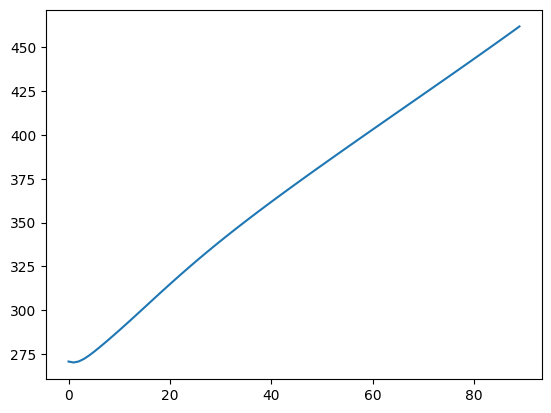

In [89]:
plt.plot(extended_predictions)

**Ploting future 90days data on original data**

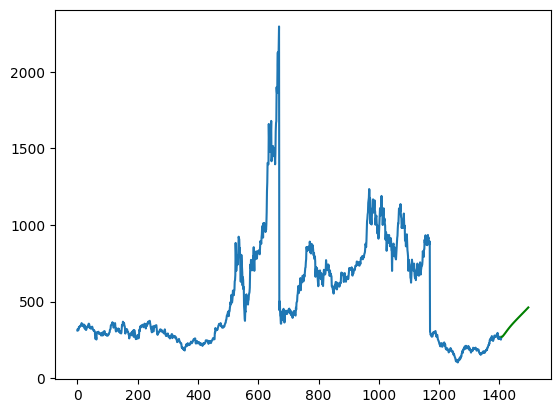

In [91]:
plt.plot(df1['open'])
plt.savefig('predicted_plot.jpg')
plt.plot(day_new_extended,extended_predictions, label="Test Prediction", color="green")
plt.savefig('plot.jpg')

**Saving the model**

In [155]:
model.save('Amazon_Lstm_stock_model.h5')

C:\Users\abinj\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
